In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
from auxilary.utils import readJson
import tqdm as notebook_tqdm
import numpy as np
from sklearn.decomposition import PCA

from segment_anything import SamPredictor, sam_model_registry

In [30]:
img_rgb = cv2.imread('/mnt/Datasets/MoNuSeg/Training/0.png')
img_rgb.shape

(256, 256, 3)

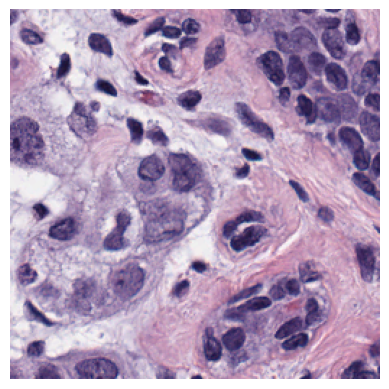

In [31]:

#plot the image
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
'''# showing only L, A, B channel separately in 3 subplots
img_l = img_lab[:,:,0]
img_a = img_lab[:,:,1]
img_b = img_lab[:,:,2] * 3

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_l )
axes[0].set_title('L channel')
axes[0].axis('off')
axes[1].imshow(img_a)
axes[1].set_title('A channel')
axes[1].axis('off')
axes[2].imshow(img_b)
axes[2].set_title('B channel')
axes[2].axis('off')
plt.show()'''

"# showing only L, A, B channel separately in 3 subplots\nimg_l = img_lab[:,:,0]\nimg_a = img_lab[:,:,1]\nimg_b = img_lab[:,:,2] * 3\n\nfig, axes = plt.subplots(1, 3, figsize=(15, 5))\naxes[0].imshow(img_l )\naxes[0].set_title('L channel')\naxes[0].axis('off')\naxes[1].imshow(img_a)\naxes[1].set_title('A channel')\naxes[1].axis('off')\naxes[2].imshow(img_b)\naxes[2].set_title('B channel')\naxes[2].axis('off')\nplt.show()"

In [33]:
# Load SAM
samWeight = "segment-anything/SAMWeight/sam_vit_b_01ec64.pth"
sam = sam_model_registry["vit_b"](checkpoint=samWeight)
predictor = SamPredictor(sam)

In [81]:
# multiply the B channel by 3 to make it more visible
embeddings = []

    #img = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)
def getEmbedding(img):
    with torch.no_grad():
        predictor.set_image(img)
        embedding = predictor.features
    return embedding

def scaleImage(uimg):
    scaled_comb = uimg 
    a_min = scaled_comb.min()
    a_max = scaled_comb.max()
    a_scaled = (scaled_comb - a_min) / (a_max - a_min)
    return a_scaled

def getPCAVisual(emb, channels = 3):
    emb_reshaped = emb.view(emb.shape[0], -1).T.cpu().numpy()
    pca = PCA(n_components=channels)
    sam_pca = pca.fit_transform(emb_reshaped)
    sam_pca = sam_pca.reshape(emb.shape[-1], emb.shape[-2], channels)
    return sam_pca

def getAvgPool(emb):
    emb = emb.cpu().numpy()
    return np.mean(emb, axis=0)

In [47]:
embeddings.append(getEmbedding(img_rgb))

In [48]:
embeddings[0].shape

torch.Size([1, 256, 64, 64])

In [49]:

pca_images = []
for emb in embeddings:
    emb = emb.squeeze(0)
    pca_images.append(getPCAVisual(emb))

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


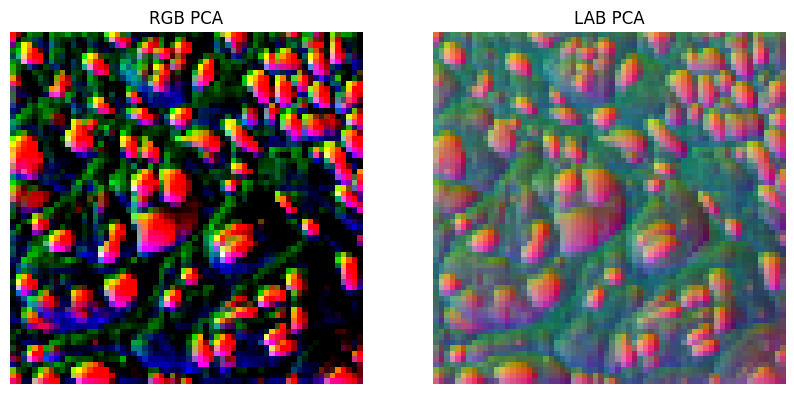

In [50]:
# plot PCA images in 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(pca_images[0])
axes[0].set_title('RGB PCA')
axes[0].axis('off')
axes[1].imshow(scaleImage(pca_images[0]))
axes[1].set_title('LAB PCA')
axes[1].axis('off')
plt.show()


In [52]:
h1 = torch.load('1-h1.pt')
h2 = torch.load('2-h2.pt')
h3 = torch.load('3-h3.pt')
h4 = torch.load('4-h4.pt')
h5 = torch.load('5-hd5.pt')
sam_enc = torch.load('6-SAM_Enc.pt')
combined = torch.load('7-combined.pt')
gatedWeights = torch.load('8-gatingWeights.pt')
gatedFeatures = torch.load('9-gatedFeatures.pt')
crossAttn = torch.load('10-crossAttention.pt')


In [82]:
Embeddings = [h1, h2, h3, h4, h5, sam_enc, combined, gatedWeights, gatedFeatures, crossAttn]
pca_images = []
pool_images = []


In [83]:
for emb in Embeddings:
    # get only first image from 16 images in batch
    emb = emb[0].detach()
    if emb.shape[1] == 1:
        pca_images.append(getPCAVisual(emb, 1))
    else:
        pca_images.append(getPCAVisual(emb))
    pool_images.append(getAvgPool(emb))

/home/bishal/projects/SAM-Guided-U-Net/samGEnv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:557: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


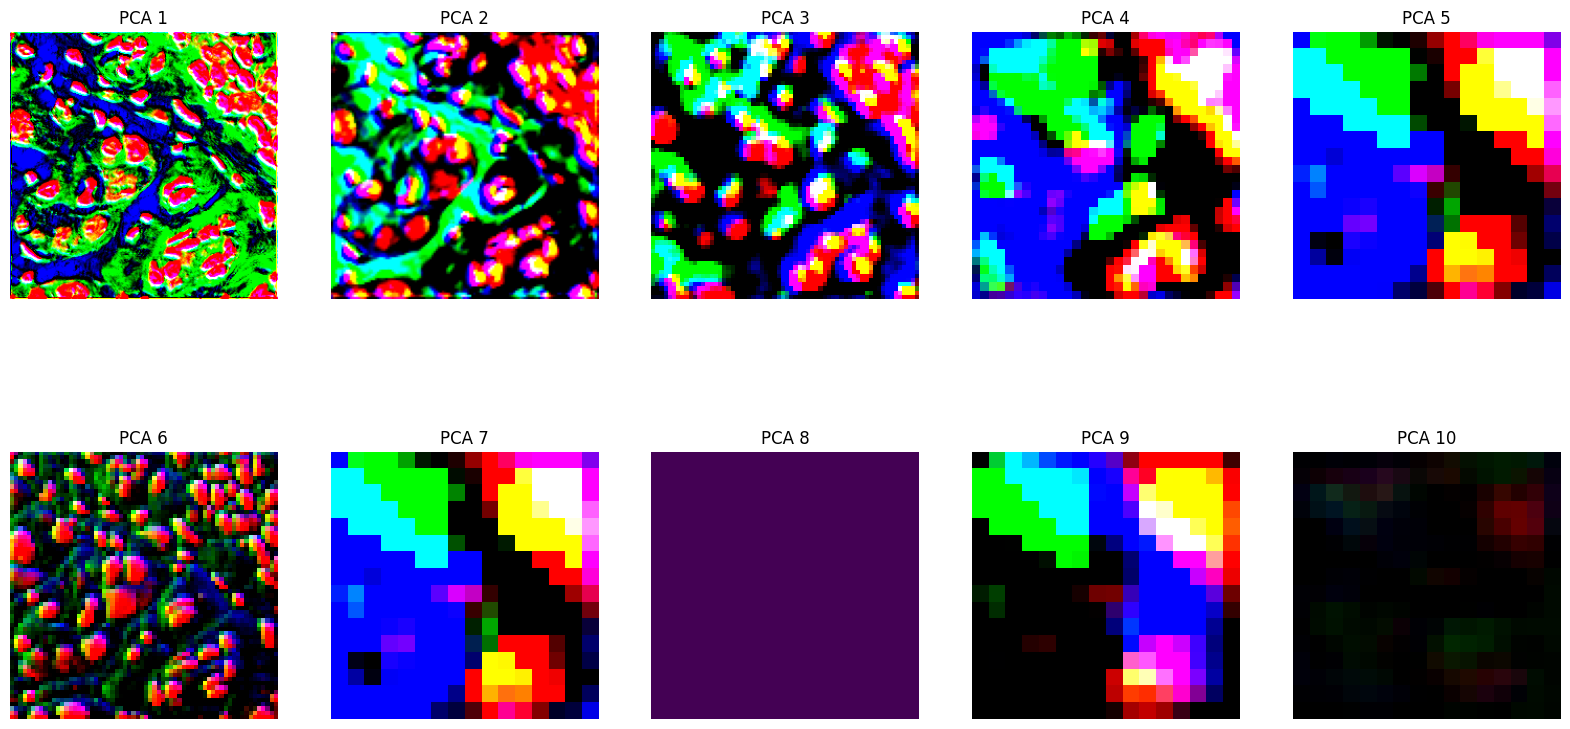

In [90]:
# plot all 10 PCA images
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(pca_images[i])
    ax.set_title(f'PCA {i+1}')
    ax.axis('off')
plt.show()


In [89]:
# save all individual PCA images to file in high resolution
for i, pca_img in enumerate(pca_images):
    plt.imshow(scaleImage(pool_images[i]), cmap='gray')
    plt.axis('off')
    plt.savefig(f'PCA_{i+1}_g.png', bbox_inches='tight', pad_inches=0)
    plt.close()

/tmp/ipykernel_1098976/4073302520.py:15: RuntimeWarning: invalid value encountered in divide
  a_scaled = (scaled_comb - a_min) / (a_max - a_min)
